In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

# New Section

importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


importing datasets 'Project2.csv' and 'ProductMaster.csv' and merging them to create a single dataset named 'data'

In [3]:
data1= pd.read_csv("/content/drive/MyDrive/Product_discontinuation-20221008T160815Z-001/Product_discontinuation/MSc Project code (001127555)/05_Project2.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Product_discontinuation-20221008T160815Z-001/Product_discontinuation/MSc Project code (001127555)/02_ProductMaster.csv")

In [5]:
data = pd.merge(data1, data2, on='ProductKey', how='left')

In [6]:
data.head(10)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
0,89,True,8108,-11,RI,43.99,250.545,248.642,False,78589,67967,32668,DOM,False
1,89,True,8108,-10,RI,43.99,255.700,244.333,False,78589,67967,32668,DOM,False
2,89,True,8108,-9,RI,43.99,206.111,252.187,False,78589,67967,32668,DOM,False
3,89,True,8108,-8,RI,43.99,188.625,254.764,False,78589,67967,32668,DOM,False
4,89,True,8108,-7,RI,43.99,169.142,249.000,False,78589,67967,32668,DOM,False
5,89,True,8108,-6,RI,43.99,160.666,244.473,False,78589,67967,32668,DOM,False
6,89,True,8108,-5,RI,43.99,138.200,251.750,False,78589,67967,32668,DOM,False
7,89,True,8108,-4,RI,43.99,122.500,255.714,False,78589,67967,32668,DOM,False
8,89,True,8108,-3,RI,43.99,89.333,249.727,False,78589,67967,32668,DOM,False
9,89,True,8108,-2,RI,43.99,85.000,242.043,False,78589,67967,32668,DOM,False


Checking null values

In [7]:
data.isna().sum()

,0
CatEdition,0
SpringSummer,0
ProductKey,0
WeeksOut,0
Status,0
SalePriceIncVAT,0
ForecastPerWeek,0
ActualsPerWeek,0
DiscontinuedTF,0
Supplier,0



Checking duplicate rows

In [8]:
data[data.duplicated()]

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal


Handling Outliers

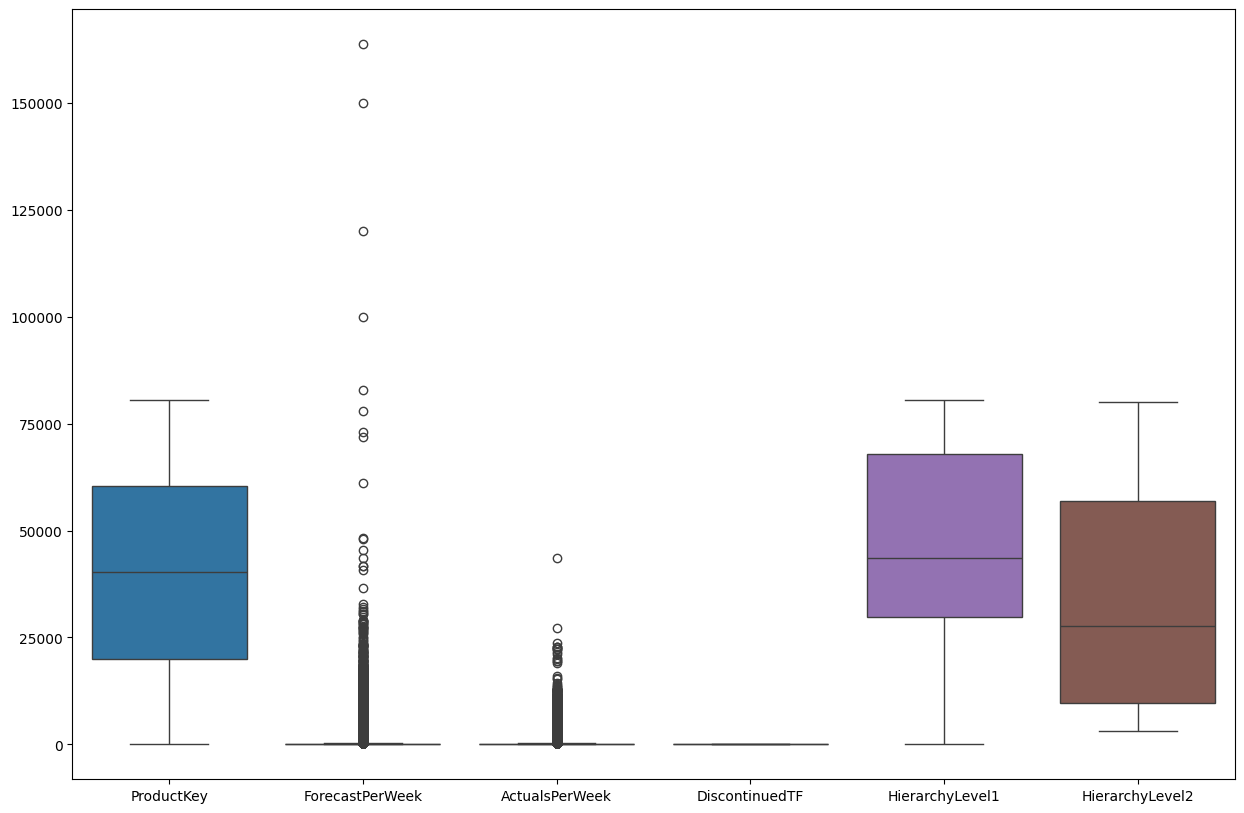

In [9]:
data_for_boxplot = data.drop(['CatEdition', 'SpringSummer','WeeksOut','SalePriceIncVAT','Supplier','Seasonal'], axis= 1)
plt.figure(figsize=(15,10))
sns.boxplot(data= data_for_boxplot)
plt.subplots_adjust(wspace=0.8, hspace =0.8)
plt.show()

Boxplot was created to analyze the outliers present in variables shown above. But no relevant information could be gathered and plotting boxplot was considered irrelevant in this project.

In [10]:
data_modified= data.copy()
data_modified['Forecast_and_Sales_diff']= data_modified['ForecastPerWeek']- data_modified['ActualsPerWeek']


Dataframe 'data' is copied to create a new dataframe 'data_modified' and new column named 'Forecast_and_Sales_diff' was created that contains difference of Forecast and Actual sales per week.

In [11]:
data_modified.describe()

,CatEdition,ProductKey,WeeksOut,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,Supplier,HierarchyLevel1,HierarchyLevel2,Forecast_and_Sales_diff
count,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06
mean,9.086631e+01,4.024302e+04,-1.297215e+01,7.816104e+01,1.316644e+02,1.090412e+02,4.049834e+04,4.349287e+04,3.226923e+04,2.262311e+01
std,1.932145e+00,2.325619e+04,6.879073e+00,1.546267e+02,3.917360e+02,2.596290e+02,2.354197e+04,2.344929e+04,2.475628e+04,3.012852e+02
min,8.800000e+01,2.000000e+00,-2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.240000e+02,3.163000e+03,-4.331054e+04
25%,8.900000e+01,2.002500e+04,-1.900000e+01,1.599000e+01,1.514200e+01,1.055500e+01,1.823900e+04,2.987300e+04,9.740000e+03,-6.464000e+00
50%,9.100000e+01,4.028500e+04,-1.300000e+01,2.999000e+01,4.660000e+01,3.866600e+01,4.053700e+04,4.347000e+04,2.778100e+04,1.817000e+00
75%,9.300000e+01,6.039400e+04,-7.000000e+00,6.999000e+01,1.270600e+02,1.108330e+02,6.094600e+04,6.796700e+04,5.692000e+04,1.885700e+01
max,9.400000e+01,8.053100e+04,-1.000000e+00,5.000000e+03,1.637575e+05,4.362633e+04,8.051600e+04,8.044500e+04,7.997600e+04,1.636250e+05


Lets count the percentage of discontinued and continued products in week -1.

In [12]:
d1= data[ data['WeeksOut']==-1]['DiscontinuedTF']
df= d1.value_counts().rename_axis('Discontinued').reset_index(name='count')
print(df)
df['count_in_percentage']= (df['count']/df['count'].sum()) *100

df['count_in_percentage']=df['count_in_percentage'].round(2)
df.drop('count', axis=1, inplace= True)

df


   Discontinued  count
0         False  94078
1          True  43969


,Discontinued,count_in_percentage
0,False,68.15
1,True,31.85


In [13]:
df= df.replace(False,'Continued')

df= df.replace(True,'Discontinued')
df= df.rename(columns={'Discontinued':'Products'})

In [14]:
df

,Products,count_in_percentage
0,Continued,68.15
1,Discontinued,31.85


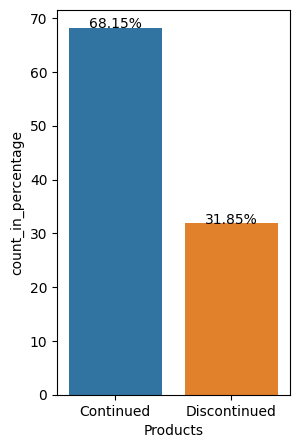

In [15]:
plt.figure(figsize=(3,5))
ax= sns.barplot(x='Products',y='count_in_percentage', hue= 'Products',data= df)

for index, row in df.iterrows():
  ax.text(row.name, row.count_in_percentage , s= "{}%".format(row.count_in_percentage),color='black', ha='center')

plt.show()

We can see that twice the number of products are getting continued than they are being discontinued.

In [16]:
data_modified = data_modified.sort_values(['CatEdition','ProductKey'])
data_modified['CatEdition'].unique()

array([88, 89, 90, 91, 92, 93, 94])

In [17]:
data_modified.groupby("CatEdition")['ProductKey'].value_counts()

CatEdition  ProductKey
88          8             24
            9             24
            10            24
            18            24
            19            24
                          ..
94          80134          1
            80230          1
            80311          1
            80394          1
            80500          1
Name: count, Length: 178905, dtype: int64

Now, we plot a bar chart to count the number of products in each catalogue

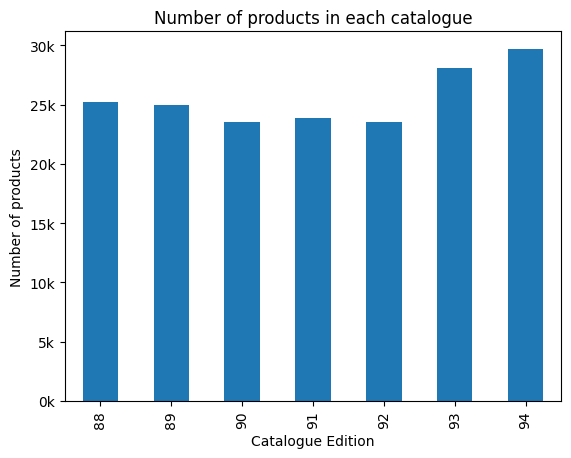

In [18]:

# Number of products in each catalogue
ax = data_modified.groupby("CatEdition")['ProductKey'].unique().apply(lambda x:len(x)).plot(kind='bar')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos:f"{y/1000:.0f}k"))
plt.ylabel("Number of products")
plt.xlabel('Catalogue Edition')
plt.title('Number of products in each catalogue')
plt.show()

Percentage of total discontinued products in each catalogue are shown below. We can see that catalogue 94 doesnot contain any discontinued products.

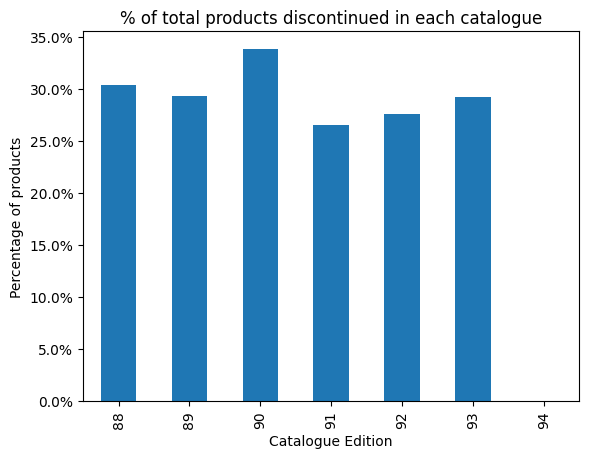

In [19]:
# Total Number of Product Discontinued in each catalogue in percentage
n_discontinued_products = data_modified[(data_modified['WeeksOut']==-1)&(data_modified['DiscontinuedTF'])].groupby(['CatEdition'])['ProductKey'].unique().apply(lambda x:len(x))
n_total_products = data_modified.groupby("CatEdition")['ProductKey'].unique().apply(lambda x:len(x))
percentage_discontinued_products = n_discontinued_products/n_total_products *100
percentage_discontinued_products = percentage_discontinued_products.fillna(0)
ax = percentage_discontinued_products.plot(kind='bar')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos:f"{y}%"))
plt.ylabel("Percentage of products")
plt.xlabel('Catalogue Edition')
plt.title('% of total products discontinued in each catalogue')
plt.show()

As, catalogue 94 didnt have any products discontinued, we decided to drop the catalogue

In [20]:
# We drop the 94 catalog because it doesnt have -1 Week values
without_94_source = data_modified[data_modified['CatEdition']!=94].reset_index(drop=True)

In [21]:
# select only those product with True disconitnuedTF where weeksout = -1
without_94_source['CatProd'] = without_94_source['CatEdition'].astype(str) +'_'+ without_94_source['ProductKey'].astype(str)
cat_prods = without_94_source[(without_94_source['WeeksOut']==-1)&(without_94_source['DiscontinuedTF'])]['CatProd'].values
discontinued_products = without_94_source[without_94_source['CatProd'].isin(cat_prods)]

Now, we need to analyse other features as well to see if the features have any affects on the discontinuation of products. Here, we take SpringSummer feature where, true in SpringSummer represents Jan to July and False in SpringSummer represents July to Jan.

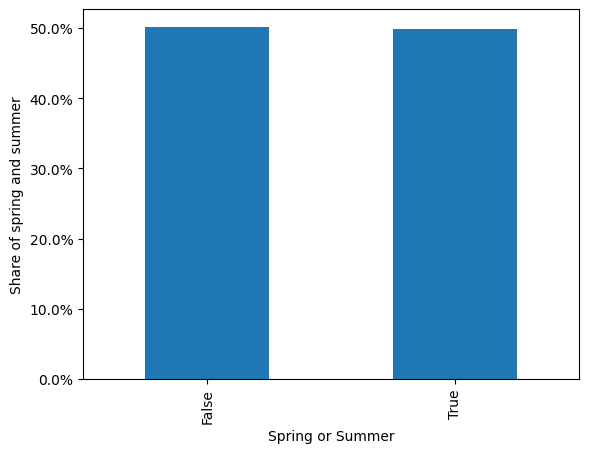

In [22]:
# share of spring summer in discontinued products
spring_summer_share = discontinued_products['SpringSummer'].value_counts()/discontinued_products['SpringSummer'].shape
ax = spring_summer_share.plot(kind='bar')
plt.ylabel('Share of spring and summer')
plt.xlabel('Spring or Summer')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos:f"{y*100:.1f}%"))


Analysing feature 'seasonal' to visualize the percentage of Summer and Winter products that have been discontinued.

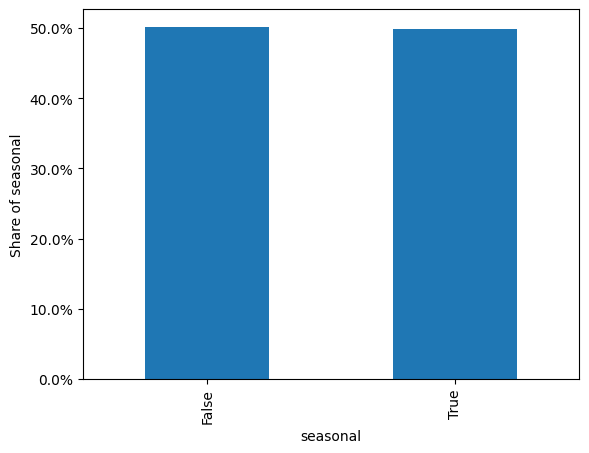

In [23]:
# share of seasonal in discontinued products
seasonal_share = discontinued_products['Seasonal'].value_counts()/discontinued_products['Seasonal'].shape
ax = spring_summer_share.plot(kind='bar')
plt.ylabel('Share of seasonal')
plt.xlabel('seasonal')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos:f"{y*100:.1f}%"))

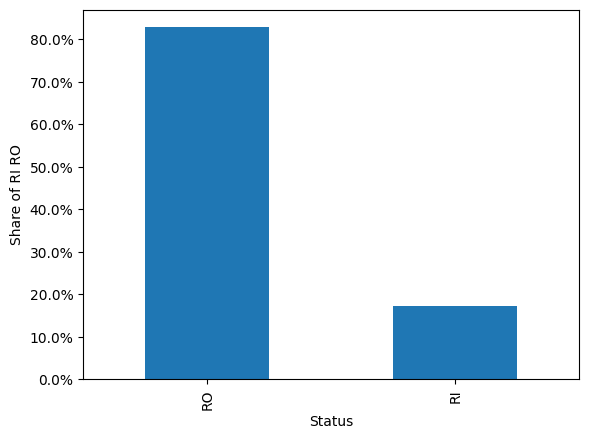

In [24]:
# share of Status in discontinued products

status_share = discontinued_products['Status'].value_counts()/discontinued_products['Status'].shape

ax = status_share.plot(kind='bar')
plt.ylabel('Share of RI RO')
plt.xlabel('Status')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos:f"{y*100:.1f}%"))

Counting the percentage of RI and RO for the discontinued products, we can see that percentage of RO is greater than RI.

In [25]:
continued_products= data[data['WeeksOut']==-1]
continued_products= continued_products[continued_products['DiscontinuedTF']==False]
continued_products.head()


,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
10,89,True,8108,-1,RI,43.99,83.0,234.291,False,78589,67967,32668,DOM,False
34,90,False,8108,-1,RI,32.99,28.0,33.625,False,78589,67967,32668,DOM,False
58,91,True,8108,-1,RI,23.99,16.0,29.458,False,78589,67967,32668,DOM,False
106,89,True,71280,-1,RI,44.99,25.0,176.041,False,65093,10159,57189,DI,False
130,90,False,71280,-1,RI,39.99,94.0,120.583,False,65093,10159,57189,DI,False


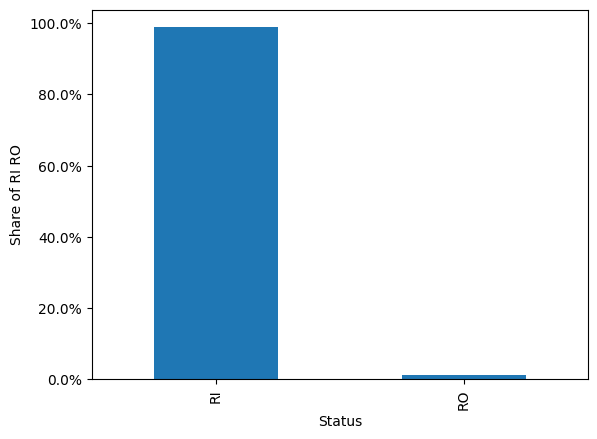

In [26]:
status_share = continued_products['Status'].value_counts()/continued_products['Status'].shape

ax = status_share.plot(kind='bar')
plt.ylabel('Share of RI RO')
plt.xlabel('Status')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos:f"{y*100:.1f}%"))

Counting the percentage of RI and RO for the continued products, we can see that percentage of RI is greater than RO.

Lets plot a piechart that shows the percentage of DI and DOM containing both discontinued and continued products


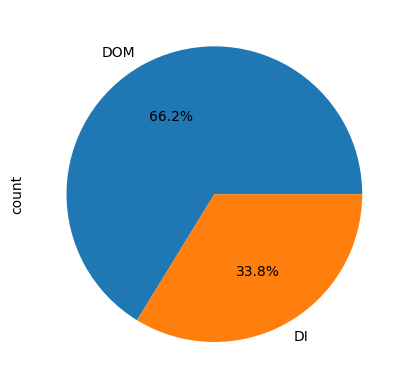

In [46]:
data_Week1= data_modified[data_modified['WeeksOut']==-1]

ax = data_Week1['DIorDOM'].value_counts()
ax.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.show()

Plotting a piechart that shows the percentage of DI and DOM containing discontinued products


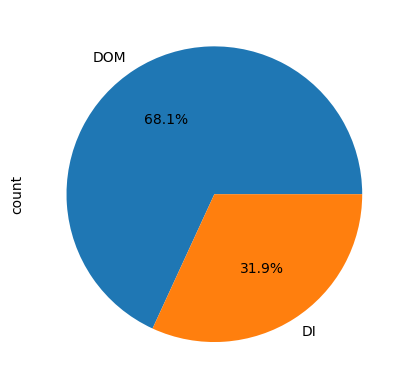

In [42]:
ax = discontinued_products['DIorDOM'].value_counts()


ax.plot(kind='pie' , y='DIorDOM',autopct='%1.1f%%',  startangle=0)
plt.show()

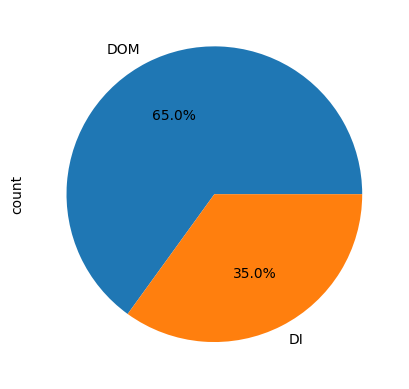

In [45]:
ax = continued_products['DIorDOM'].value_counts()


ax.plot(kind='pie' , y='DIorDOM',autopct='%1.1f%%',  startangle=0)
plt.show()

Ploting Kde plot to visualize the density of Actual sales per week



<Axes: xlabel='ActualsPerWeek', ylabel='Density'>

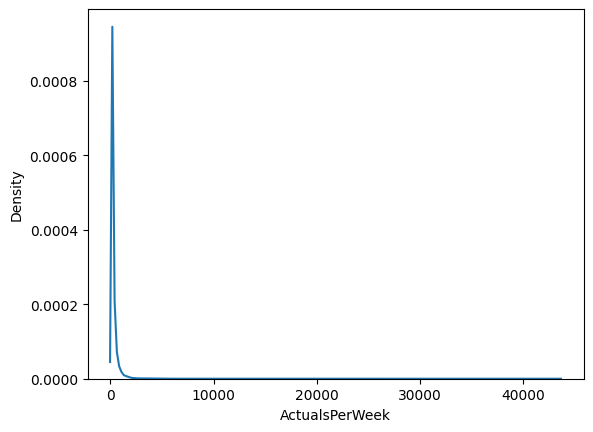

In [47]:
sns.kdeplot(data=data_modified, x="ActualsPerWeek")

Ploting Kde plot to visualize the density of Forecast week



<Axes: xlabel='ForecastPerWeek', ylabel='Density'>

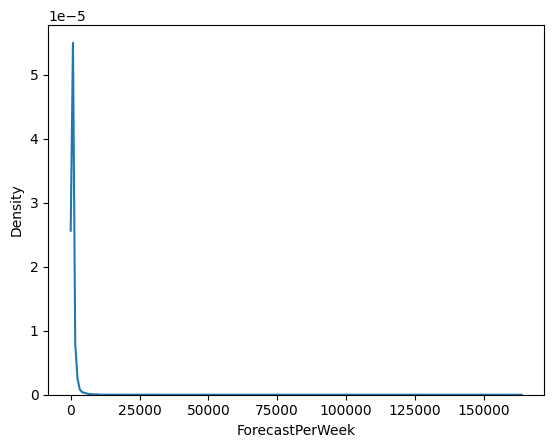

In [48]:
sns.kdeplot(data=data_modified, x="ForecastPerWeek")

Label Encoding DiscontinuedTF

In [49]:
data_modified_encoded= data_modified.copy()
Le = LabelEncoder()
data_modified_encoded['DiscontinuedTF']= Le.fit_transform(data_modified_encoded['DiscontinuedTF'])

data_modified_encoded.head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,Forecast_and_Sales_diff
3068543,88,False,8,-24,RI,59.99,6.041,10.00,0,9131,32063,79976,DI,False,-3.959
3068544,88,False,8,-23,RI,59.99,5.869,8.50,0,9131,32063,79976,DI,False,-2.631
3068545,88,False,8,-22,RI,59.99,5.363,8.00,0,9131,32063,79976,DI,False,-2.637
3068546,88,False,8,-21,RI,59.99,5.428,8.25,0,9131,32063,79976,DI,False,-2.822
3068547,88,False,8,-20,RI,59.99,6.750,9.80,0,9131,32063,79976,DI,False,-3.050


As, no products have been discontinued in catalog 94, the catalog 94  was discarded.

In [50]:
#probability of change of RI to RO from week 24 to 23

# without_94_source[without_94_source['WeeksOut'].isin([-24,-23])].head(10)
df = without_94_source[without_94_source['WeeksOut']<-22][['CatEdition','ProductKey','WeeksOut','Status']]
df.head()

,CatEdition,ProductKey,WeeksOut,Status
0,88,8,-24,RI
1,88,8,-23,RI
24,88,9,-24,RI
25,88,9,-23,RI
48,88,10,-24,RI


Here, a transition matrix has been created that displays the probability of shifting of status values i.e. RI and RO in each consecutive weeks.

In [51]:
test_df = pd.DataFrame({'status':['a','a','a','b','b','a','a','b'],'weeks':[24,23,24,23,24,23,24,23]})
def create_transition_matrix(df,week1,week2,colname,normalize=True):
  df = df[df['WeeksOut']<(abs(week2)-1)]
  df['shifted'] = df[colname].shift(abs(week1)-abs(week2))
  df = df[df['WeeksOut']==week2]
  df=df[['shifted',colname]]
  df.columns = [week1,week2]
  transition_matrix = pd.crosstab(df[week1],df[week2])

  if normalize:
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1),axis=0)
  return transition_matrix

In [52]:
a= -24
b= -23


for i in range (23):
  tm= create_transition_matrix(without_94_source,a,b,'Status')

  print(tm)
  a=a+1
  b=b+1



-23        RI        RO
-24                    
RI   0.969069  0.030931
RO   0.100226  0.899774
-22        RI        RO
-23                    
RI   0.967585  0.032415
RO   0.136628  0.863372
-21        RI        RO
-22                    
RI   0.966941  0.033059
RO   0.108726  0.891274
-20        RI        RO
-21                    
RI   0.969622  0.030378
RO   0.062408  0.937592
-19        RI        RO
-20                    
RI   0.982319  0.017681
RO   0.069250  0.930750
-18        RI        RO
-19                    
RI   0.976129  0.023871
RO   0.015597  0.984403
-17        RI        RO
-18                    
RI   0.990071  0.009929
RO   0.118514  0.881486
-16        RI        RO
-17                    
RI   0.987236  0.012764
RO   0.049103  0.950897
-15        RI        RO
-16                    
RI   0.983108  0.016892
RO   0.052115  0.947885
-14        RI        RO
-15                    
RI   0.984592  0.015408
RO   0.023653  0.976347
-13        RI        RO
-14             

Here, a transition matrix has been created that displays the probability of shifting of status values i.e. RI and RO in each week with respect to week -1.

In [53]:
a= -24
b= -1


for i in range (23):
  tm= create_transition_matrix(without_94_source,a,b,'Status')

  print(tm)
  a=a+1




-1         RI        RO
-24                    
RI   0.911903  0.088097
RO   0.561954  0.438046
-1         RI        RO
-23                    
RI   0.910939  0.089061
RO   0.531591  0.468409
-1         RI        RO
-22                    
RI   0.915277  0.084723
RO   0.480747  0.519253
-1         RI        RO
-21                    
RI   0.922140  0.077860
RO   0.438116  0.561884
-1         RI        RO
-20                    
RI   0.940654  0.059346
RO   0.397948  0.602052
-1         RI        RO
-19                    
RI   0.948484  0.051516
RO   0.357396  0.642604
-1         RI        RO
-18                    
RI   0.956712  0.043288
RO   0.345681  0.654319
-1         RI        RO
-17                    
RI   0.955065  0.044935
RO   0.277789  0.722211
-1         RI        RO
-16                    
RI   0.961587  0.038413
RO   0.247113  0.752887
-1         RI        RO
-15                    
RI   0.968759  0.031241
RO   0.216904  0.783096
-1         RI        RO
-14             

Number of products that had been discontinued even if the status was 'RI'

In [54]:
data_discontinued_but_RI= data.query('Status == "RI" and DiscontinuedTF == True and WeeksOut == -1')
len(data_discontinued_but_RI)

7350

Lets analyse the Actual sales according to their weeks out for catalogue 89. Here, we are taking only 8 productkeys for products that have been discontinued and continued in last week of catalogue launch and analyse their behaviour/ trend.

In [55]:
data_modified['ProductKey'] = data_modified['ProductKey'].astype(str)
data_modified['CatEdition'] = data_modified['CatEdition'].astype(str)

In [56]:
_89catalog = data_modified.query("CatEdition=='89'")
_89catalog.head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,Forecast_and_Sales_diff
3068567,89,True,8,-24,RI,59.99,21.333,88.000,True,9131,32063,79976,DI,False,-66.667
3068568,89,True,8,-23,RI,59.99,21.695,95.000,True,9131,32063,79976,DI,False,-73.305
3068569,89,True,8,-22,RI,59.99,22.045,85.666,True,9131,32063,79976,DI,False,-63.621
3068570,89,True,8,-21,RI,59.99,22.428,68.250,True,9131,32063,79976,DI,False,-45.822
3068571,89,True,8,-20,RI,59.99,16.100,55.600,True,9131,32063,79976,DI,False,-39.500


In [57]:
_89catalog_week1= _89catalog.query("WeeksOut ==-1")
_89catalog_week1.head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,Forecast_and_Sales_diff
3068590,89,True,8,-1,RI,59.99,3.0,16.750,True,9131,32063,79976,DI,False,-13.750
2006325,89,True,9,-1,RI,69.99,17.0,52.333,False,41154,33994,71089,DI,False,-35.333
141670,89,True,10,-1,RI,14.99,84.0,98.625,False,69,77602,71089,DOM,False,-14.625
2857600,89,True,29,-1,RI,34.99,84.0,100.583,False,78396,152,9740,DI,False,-16.583
3566570,89,True,36,-1,RI,15.00,8.0,23.750,False,61264,67967,27781,DOM,False,-15.750


In [58]:
discontinued_89_cat=  _89catalog_week1[_89catalog_week1['DiscontinuedTF']==True]
continued_89_cat=  _89catalog_week1[_89catalog_week1['DiscontinuedTF']==False]

In [59]:
continued_89_cat.head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,Forecast_and_Sales_diff
2006325,89,True,9,-1,RI,69.99,17.0,52.333,False,41154,33994,71089,DI,False,-35.333
141670,89,True,10,-1,RI,14.99,84.0,98.625,False,69,77602,71089,DOM,False,-14.625
2857600,89,True,29,-1,RI,34.99,84.0,100.583,False,78396,152,9740,DI,False,-16.583
3566570,89,True,36,-1,RI,15.00,8.0,23.750,False,61264,67967,27781,DOM,False,-15.750
3115148,89,True,43,-1,RI,32.99,19.0,10.708,False,58576,66144,61779,DOM,False,8.292


In [60]:
discontinued_products_89catalog = discontinued_89_cat['ProductKey'].unique()
continued_products_89catalog = continued_89_cat['ProductKey'].unique()

In [61]:
np.random.seed(45)
random_Productkey_discontinued=[str(x) for x in np.random.choice(discontinued_89_cat['ProductKey'].values,8)]
random_Productkey_continued=[str(x) for x in np.random.choice( continued_89_cat['ProductKey'].values,8)]

In [62]:
print(random_Productkey_discontinued)
print(random_Productkey_continued)

['78199', '71762', '63349', '66062', '40388', '52246', '1820', '6403']
['66345', '19434', '64573', '3138', '45193', '71505', '67371', '42505']


In [63]:
discontinued_89_cat[discontinued_89_cat['ProductKey'].isin(random_Productkey_discontinued)]

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,Forecast_and_Sales_diff
1837413,89,True,1820,-1,RO,24.99,8.0,10.958,True,14255,66144,61779,DOM,False,-2.958
1813566,89,True,6403,-1,RI,599.99,2.0,2.958,True,17995,43740,54877,DOM,False,-0.958
3536049,89,True,40388,-1,RO,15.99,172.0,280.750,True,40598,67917,28611,DOM,False,-108.750
2159937,89,True,52246,-1,RO,5.99,9.0,15.916,True,67458,69740,53044,DOM,False,-6.916
2753624,89,True,63349,-1,RO,159.99,8.0,5.083,True,52218,66144,61779,DOM,False,2.917
2518483,89,True,66062,-1,RO,109.99,73.0,32.125,True,57826,51909,3986,DOM,False,40.875
2981171,89,True,71762,-1,RI,11.99,3.0,7.291,True,66435,69740,53044,DOM,False,-4.291
3511363,89,True,78199,-1,RO,28.99,41.0,15.125,True,42213,8235,22062,DI,False,25.875


In [64]:
data_modified_discontinued= _89catalog[_89catalog['ProductKey'].isin(random_Productkey_discontinued)]
data_modified_continued= _89catalog[_89catalog['ProductKey'].isin(random_Productkey_continued)]

Line plot showing trend for Actual Sales per week with respect to Weeks from -24 to -1 where the products have been discontinued and continued in week -1 for catalgue 89.

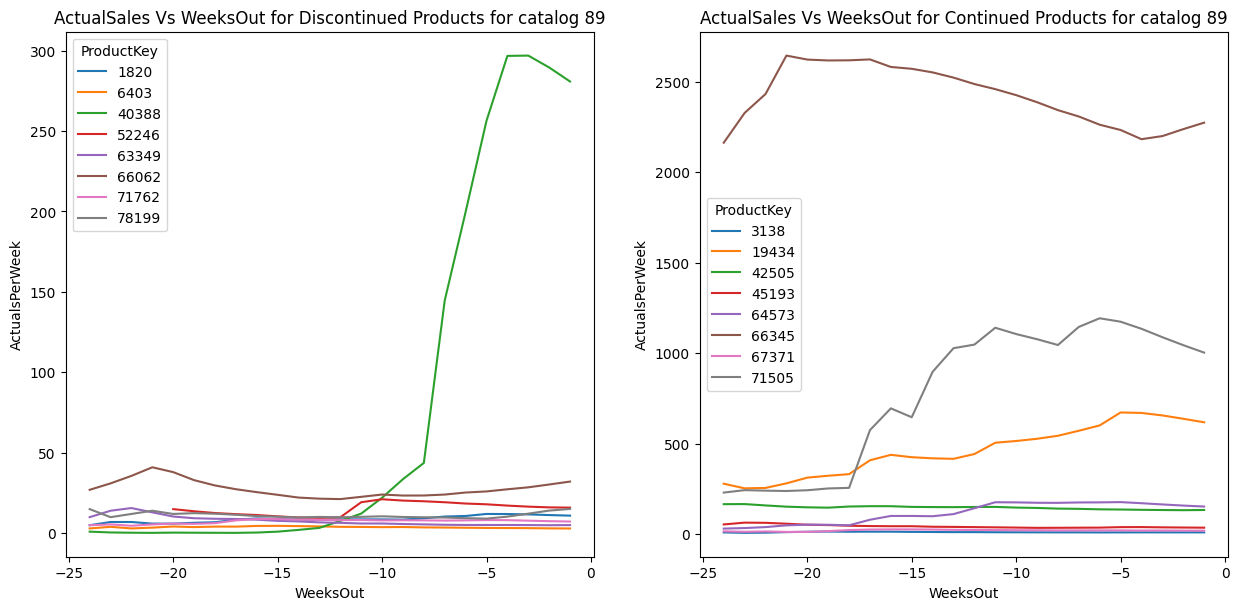

In [65]:
fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot(221)
sns.lineplot(data=data_modified_discontinued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Discontinued Products for catalog 89')

ax = fig.add_subplot(222)
sns.lineplot(data=data_modified_continued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Continued Products for catalog 89')
plt.show()

Lets plot a lineplot showing trend for Actual Sales per week with respect to Weeks from -24 to -1 where the products have been discontinued and continued in week -1 for catalgue 92.

        CatEdition  SpringSummer ProductKey  WeeksOut Status  SalePriceIncVAT  \
721959          92         False          5        -1     RI            18.99   
337355          92         False          7        -1     RO            70.00   
3068662         92         False          8        -1     RI            59.99   
2006397         92         False          9        -1     RI            69.99   
141742          92         False         10        -1     RI            15.00   

         ForecastPerWeek  ActualsPerWeek  DiscontinuedTF  Supplier  \
721959              10.0           5.375           False     43394   
337355              17.0          13.791            True     76642   
3068662              6.0           5.541           False      9131   
2006397             55.0          43.666           False     41154   
141742              42.0          44.541           False        69   

         HierarchyLevel1  HierarchyLevel2 DIorDOM  Seasonal  \
721959             32593     

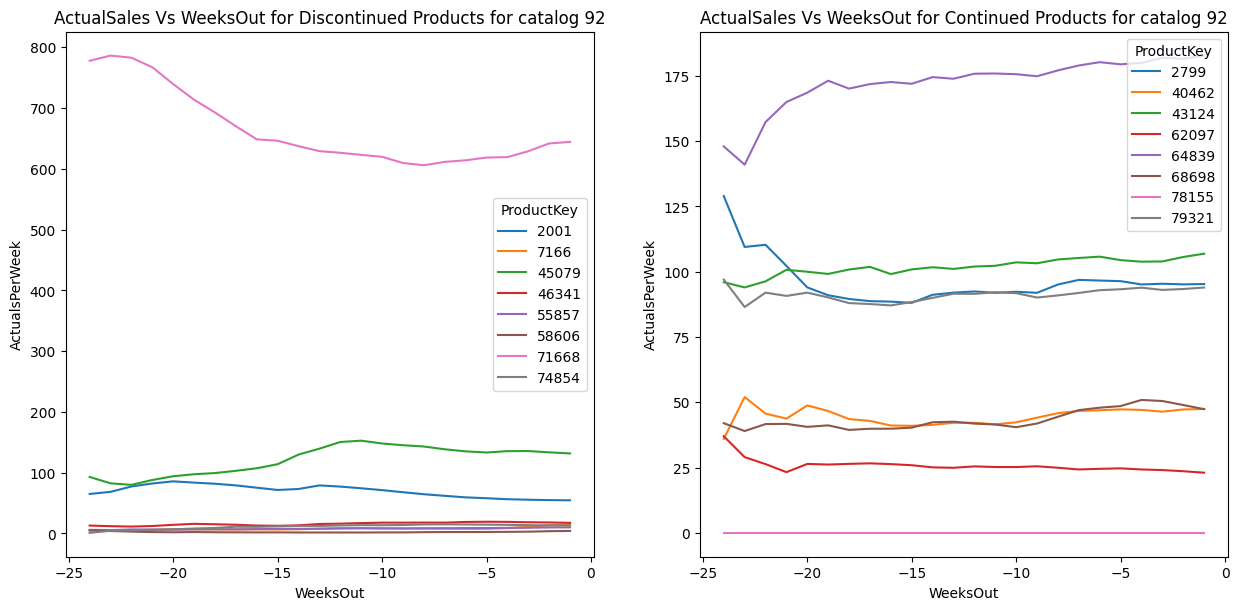

In [66]:
_92catalog = data_modified.query("CatEdition=='92'")
(_92catalog.head())

_92catalog_week1= _92catalog.query('WeeksOut ==-1')
print(_92catalog_week1.head())

discontinued_92_cat=  _92catalog_week1[_92catalog_week1['DiscontinuedTF']==True]
continued_92_cat=  _92catalog_week1[_92catalog_week1['DiscontinuedTF']==False]

discontinued_products_92catalog = discontinued_92_cat['ProductKey'].unique()
continued_products_92catalog = continued_92_cat['ProductKey'].unique()

np.random.seed(45)
random_Productkey_discontinued=[str(x) for x in np.random.choice(discontinued_92_cat['ProductKey'].values,8)]
random_Productkey_continued=[str(x) for x in np.random.choice( continued_92_cat['ProductKey'].values,8)]

data_modified_discontinued= _92catalog[_92catalog['ProductKey'].isin(random_Productkey_discontinued)]

data_modified_continued= _92catalog[_92catalog['ProductKey'].isin(random_Productkey_continued)]

print(data_modified_discontinued['ProductKey'].unique())
print(data_modified_continued['ProductKey'].unique())

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot(221)
sns.lineplot(data=data_modified_discontinued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Discontinued Products for catalog 92')

ax = fig.add_subplot(222)
sns.lineplot(data=data_modified_continued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Continued Products for catalog 92')
plt.show()

Lets plot a lineplot showing trend for Actual Sales per week with respect to Weeks from -24 to -1 where the products have been discontinued and continued in week -1 for catalgue 93.

        CatEdition  SpringSummer ProductKey  WeeksOut Status  SalePriceIncVAT  \
721983          93          True          5        -1     RI            18.99   
3068686         93          True          8        -1     RI            59.99   
2006421         93          True          9        -1     RI            79.99   
141766          93          True         10        -1     RI            15.00   
818844          93          True         11        -1     RO            10.00   

         ForecastPerWeek  ActualsPerWeek  DiscontinuedTF  Supplier  \
721983              23.0           5.875           False     43394   
3068686              4.0          10.583            True      9131   
2006421             10.0          53.916           False     41154   
141766              44.0          44.416           False        69   
818844               1.0           3.291            True     13194   

         HierarchyLevel1  HierarchyLevel2 DIorDOM  Seasonal  \
721983             32593     

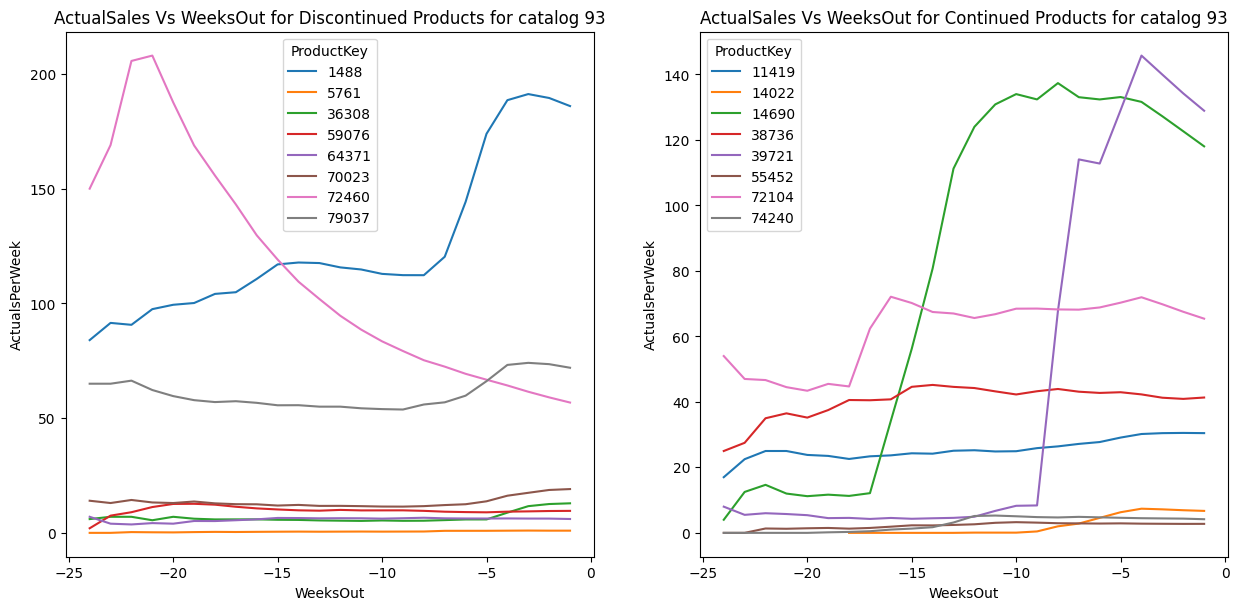

In [67]:
_93catalog = data_modified.query("CatEdition=='93'")
(_93catalog.head())

_93catalog_week1= _93catalog.query('WeeksOut ==-1')
print(_93catalog_week1.head())

discontinued_93_cat=  _93catalog_week1[_93catalog_week1['DiscontinuedTF']==True]
continued_93_cat=  _93catalog_week1[_93catalog_week1['DiscontinuedTF']==False]

discontinued_products_93catalog = discontinued_93_cat['ProductKey'].unique()
continued_products_93catalog = continued_93_cat['ProductKey'].unique()

np.random.seed(45)
random_Productkey_discontinued=[str(x) for x in np.random.choice(discontinued_93_cat['ProductKey'].values,8)]
random_Productkey_continued=[str(x) for x in np.random.choice( continued_93_cat['ProductKey'].values,8)]

data_modified_discontinued= _93catalog[_93catalog['ProductKey'].isin(random_Productkey_discontinued)]


data_modified_continued= _93catalog[_93catalog['ProductKey'].isin(random_Productkey_continued)]


print(data_modified_discontinued['ProductKey'].unique())
print(data_modified_continued['ProductKey'].unique())

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot(221)
sns.lineplot(data=data_modified_discontinued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Discontinued Products for catalog 93')

ax = fig.add_subplot(222)
sns.lineplot(data=data_modified_continued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Continued Products for catalog 93')
plt.show()

        CatEdition  SpringSummer ProductKey  WeeksOut Status  SalePriceIncVAT  \
721912          90         False          5        -1     RI            18.99   
337307          90         False          7        -1     RI            69.99   
3068614         90         False          8        -1     RI            59.99   
2006349         90         False          9        -1     RI            69.99   
141694          90         False         10        -1     RI            14.99   

         ForecastPerWeek  ActualsPerWeek  DiscontinuedTF  Supplier  \
721912               2.0           0.375            True     43394   
337307              48.0          38.000           False     76642   
3068614              5.0           3.583           False      9131   
2006349             52.0          44.041           False     41154   
141694              52.0          61.333           False        69   

         HierarchyLevel1  HierarchyLevel2 DIorDOM  Seasonal  \
721912             32593     

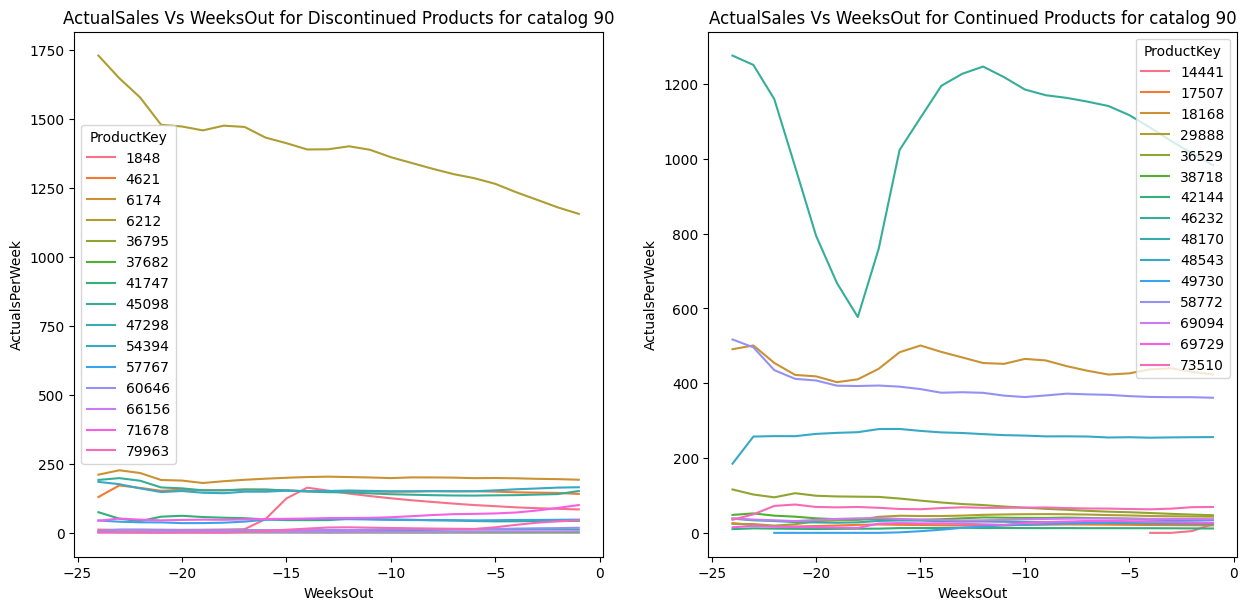

In [68]:
_90catalog = data_modified.query("CatEdition=='90'")
(_90catalog.head())

_90catalog_week1= _90catalog.query('WeeksOut ==-1')
print(_90catalog_week1.head())

discontinued_90_cat=  _90catalog_week1[_90catalog_week1['DiscontinuedTF']==True]
continued_90_cat=  _90catalog_week1[_90catalog_week1['DiscontinuedTF']==False]

discontinued_products_90catalog = discontinued_90_cat['ProductKey'].unique()
continued_products_90catalog = continued_90_cat['ProductKey'].unique()

np.random.seed(45)
random_Productkey_discontinued=[str(x) for x in np.random.choice(discontinued_90_cat['ProductKey'].values,15)]
random_Productkey_continued=[str(x) for x in np.random.choice( continued_90_cat['ProductKey'].values,15)]

data_modified_discontinued= _90catalog[_90catalog['ProductKey'].isin(random_Productkey_discontinued)]


data_modified_continued= _90catalog[_90catalog['ProductKey'].isin(random_Productkey_continued)]


print(data_modified_discontinued['ProductKey'].unique())
print(data_modified_continued['ProductKey'].unique())

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot(221)
sns.lineplot(data=data_modified_discontinued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Discontinued Products for catalog 90')

ax = fig.add_subplot(222)
sns.lineplot(data=data_modified_continued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Continued Products for catalog 90')
plt.show()

        CatEdition  SpringSummer ProductKey  WeeksOut Status  SalePriceIncVAT  \
678766          91          True          3        -1     RO            12.00   
721935          91          True          5        -1     RI            18.99   
337331          91          True          7        -1     RO            70.00   
3068638         91          True          8        -1     RI            47.99   
2006373         91          True          9        -1     RI            69.99   

         ForecastPerWeek  ActualsPerWeek  DiscontinuedTF  Supplier  \
678766              46.0          45.208            True     13873   
721935               5.0           7.458            True     43394   
337331              64.0          47.833           False     76642   
3068638              6.0          18.791            True      9131   
2006373             75.0         111.333           False     41154   

         HierarchyLevel1  HierarchyLevel2 DIorDOM  Seasonal  \
678766             21640     

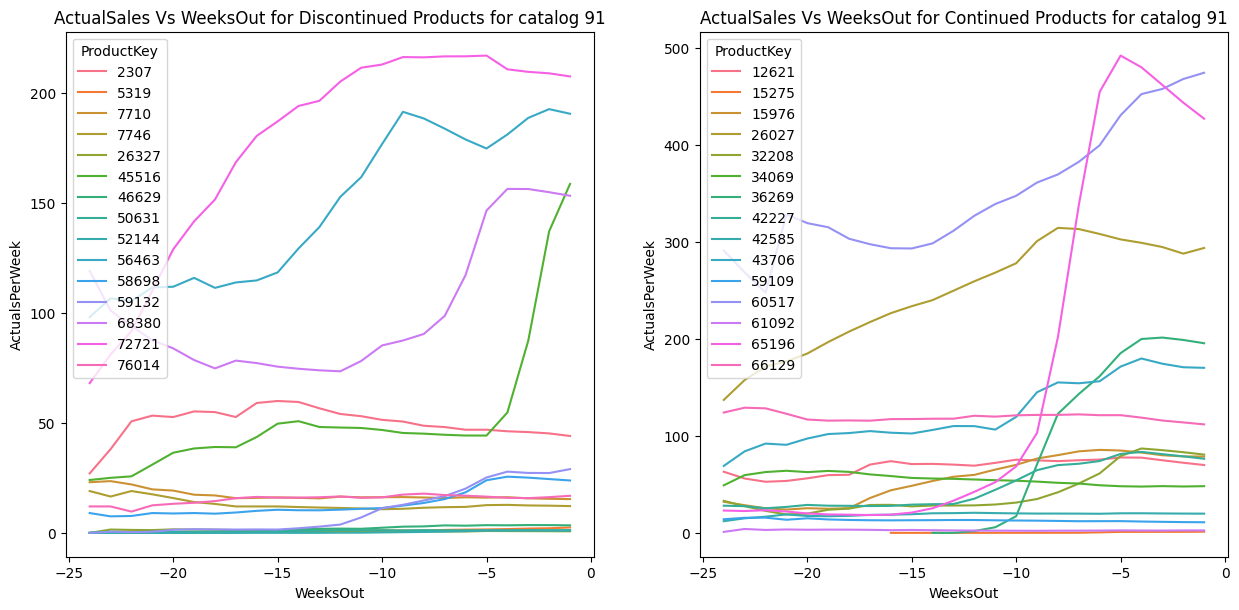

In [69]:
_91catalog = data_modified.query("CatEdition=='91'")
(_91catalog.head())

_91catalog_week1= _91catalog.query('WeeksOut ==-1')
print(_91catalog_week1.head())

discontinued_91_cat=  _91catalog_week1[_91catalog_week1['DiscontinuedTF']==True]
continued_91_cat=  _91catalog_week1[_91catalog_week1['DiscontinuedTF']==False]

discontinued_products_91catalog = discontinued_91_cat['ProductKey'].unique()
continued_products_91catalog = continued_91_cat['ProductKey'].unique()

np.random.seed(45)
random_Productkey_discontinued=[str(x) for x in np.random.choice(discontinued_91_cat['ProductKey'].values,15)]
random_Productkey_continued=[str(x) for x in np.random.choice( continued_91_cat['ProductKey'].values,15)]

data_modified_discontinued= _91catalog[_91catalog['ProductKey'].isin(random_Productkey_discontinued)]


data_modified_continued= _91catalog[_91catalog['ProductKey'].isin(random_Productkey_continued)]


print(data_modified_discontinued['ProductKey'].unique())
print(data_modified_continued['ProductKey'].unique())

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot(221)
sns.lineplot(data=data_modified_discontinued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Discontinued Products for catalog 91')

ax = fig.add_subplot(222)
sns.lineplot(data=data_modified_continued,x='WeeksOut',y='ActualsPerWeek',hue='ProductKey')
plt.title('ActualSales Vs WeeksOut for Continued Products for catalog 91')
plt.show()

Here, following lineplot shows the difference of Forecast and Sales according to the weeks out i.e. from week -24 to week -1.

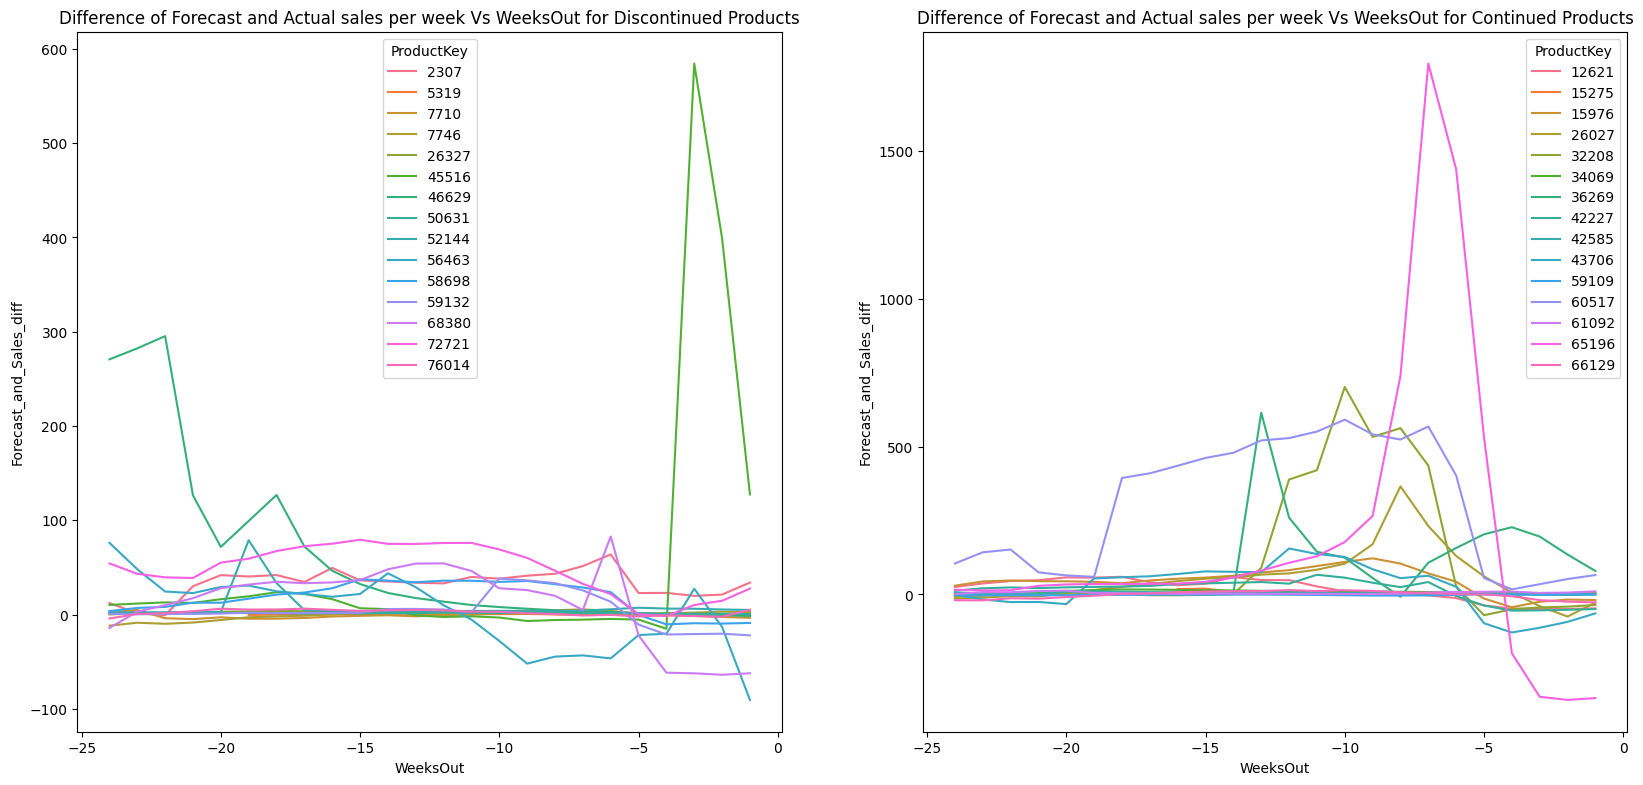

In [70]:
fig = plt.figure(figsize= (20,20))
ax = fig.add_subplot(221)
sns.lineplot(data=data_modified_discontinued,x='WeeksOut',y='Forecast_and_Sales_diff',hue='ProductKey')
plt.title('Difference of Forecast and Actual sales per week Vs WeeksOut for Discontinued Products')

ax = fig.add_subplot(222)
sns.lineplot(data=data_modified_continued,x='WeeksOut',y='Forecast_and_Sales_diff',hue='ProductKey')
plt.title('Difference of Forecast and Actual sales per week Vs WeeksOut for Continued Products')
plt.show()

Feature Selection using **SelectKBest**

In [71]:
feature_columns=['CatEdition', 'SpringSummer', 'ProductKey', 'WeeksOut', 'Status',
       'SalePriceIncVAT', 'ForecastPerWeek', 'ActualsPerWeek',
       'DiscontinuedTF', 'Supplier', 'HierarchyLevel1', 'HierarchyLevel2',
       'DIorDOM', 'Seasonal']

In [72]:
Le = LabelEncoder()
col1 = ['SpringSummer','DiscontinuedTF', 'Status','DIorDOM','Seasonal']
for i in col1:

 data[i] = Le.fit_transform(data[i])

In [73]:
X = data.drop('DiscontinuedTF', axis= 1)
y= data['DiscontinuedTF']

Feature CatEdition: 79682.127288
Feature SpringSummer: 41431.061680
Feature ProductKey: 3.817305
Feature WeeksOut: 31039.410313
Feature Status: 1727247.021497
Feature SalePriceIncVAT: 18413.319127
Feature ForecastPerWeek: 25778.417976
Feature ActualsPerWeek: 50380.627652
Feature DiscontinuedTF: 3423.586524
Feature Supplier: 56.694480
Feature HierarchyLevel1: 983.678210
Feature HierarchyLevel2: 5229.736227
Feature DIorDOM: 1592.613444


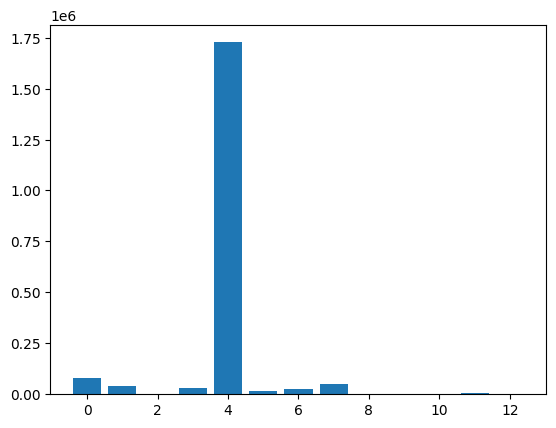

In [74]:

# example of correlation feature selection for numerical data

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

from matplotlib import pyplot



# feature selection

def select_features(X_train, y_train, X_test):

  # configure to select all features

  fs = SelectKBest(score_func=f_classif, k='all')

  # learn relationship from training data

  fs.fit(X_train, y_train)

  # transform train input data

  X_train_fs = fs.transform(X_train)

  # transform test input data

  X_test_fs = fs.transform(X_test)

  return X_train_fs, X_test_fs, fs



# load the dataset

# X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features

for i in range(len(fs.scores_)):

  print('Feature %s: %f' % (feature_columns[i], fs.scores_[i]))

# plot the scores

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)

pyplot.show()

From the feature selection, we observed that variable 'Status' has the highest value and variables 'CatEdition', 'SprinSummer','WeeksOut','SalePriceIncVAT','ForecastPerWeek','ActualsPerWeek' and 'HierarchyLevel1' were considered as best features.

In [75]:
processed_data = data.copy()

In [76]:
processed_data= processed_data.drop(['Seasonal','DIorDOM','HierarchyLevel1','Supplier','ProductKey'], axis= 1)
processed_data.head()

,CatEdition,SpringSummer,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,HierarchyLevel2
0,89,1,-11,0,43.99,250.545,248.642,0,32668
1,89,1,-10,0,43.99,255.700,244.333,0,32668
2,89,1,-9,0,43.99,206.111,252.187,0,32668
3,89,1,-8,0,43.99,188.625,254.764,0,32668
4,89,1,-7,0,43.99,169.142,249.000,0,32668


**Label Encoding**

In [77]:
Le = LabelEncoder()
col1 = ['SpringSummer','DiscontinuedTF', 'Status']
for i in col1:

  processed_data[i] = Le.fit_transform(processed_data[i])

In [78]:
processed_data.head()

,CatEdition,SpringSummer,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,HierarchyLevel2
0,89,1,-11,0,43.99,250.545,248.642,0,32668
1,89,1,-10,0,43.99,255.700,244.333,0,32668
2,89,1,-9,0,43.99,206.111,252.187,0,32668
3,89,1,-8,0,43.99,188.625,254.764,0,32668
4,89,1,-7,0,43.99,169.142,249.000,0,32668


Lets have a look at the correlation between Forecast per week, Actual sales per week and DiscontinuedTF using Heatmap

In [79]:
data_for_corr= processed_data.drop(['Seasonal','SpringSummer','ProductKey','Supplier','Forecast_and_Sales_diff'], axis=1)

# data_for_corr.head()
data_for_corr= data_for_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_for_corr, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True)

plt.show()

KeyError: "['Seasonal', 'ProductKey', 'Supplier', 'Forecast_and_Sales_diff'] not found in axis"

It seems that Forecast and Actual Sales per week has positive correlation with each other which means if Actual sales increases, there is an increase in Forecast as well and vice versa. We can also see that the target variable has correlation with variable 'Status'.

Categorizing dataset into train and test data where 'X' represents train dataset and 'y' represent test dataset.

In [80]:
X = processed_data.drop('DiscontinuedTF', axis= 1)
y= processed_data['DiscontinuedTF']

In [81]:
print(X.head)
print(y.head)

<bound method NDFrame.head of          CatEdition  SpringSummer  WeeksOut  Status  SalePriceIncVAT  \
0                89             1       -11       0            43.99   
1                89             1       -10       0            43.99   
2                89             1        -9       0            43.99   
3                89             1        -8       0            43.99   
4                89             1        -7       0            43.99   
...             ...           ...       ...     ...              ...   
3625654          89             1       -16       0            43.99   
3625655          89             1       -15       0            43.99   
3625656          89             1       -14       0            43.99   
3625657          89             1       -13       0            43.99   
3625658          89             1       -12       0            43.99   

         ForecastPerWeek  ActualsPerWeek  HierarchyLevel2  
0                250.545         248.642     

**Scaling**

Standard scaling data to re-scale features value with the distribution value between 0 and 1.

In [82]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

**Train Test Split**

Spliting the dataset into train and test sample with test size 0.2 i.e 20% of the dataset is used for testing the performance of algorithm.

In [83]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2)

**Using various Algorithms**

**Logistic Regression**

In [84]:
lg= LogisticRegression()
lg.fit(X_train, y_train)


LogisticRegression()

In [85]:
y_pred_lg= lg.predict(X_test)
print("Accuracy score of Logistic Regression :", accuracy_score(y_pred_lg, y_test))

Accuracy score of Logistic Regression : 0.8372820396838093


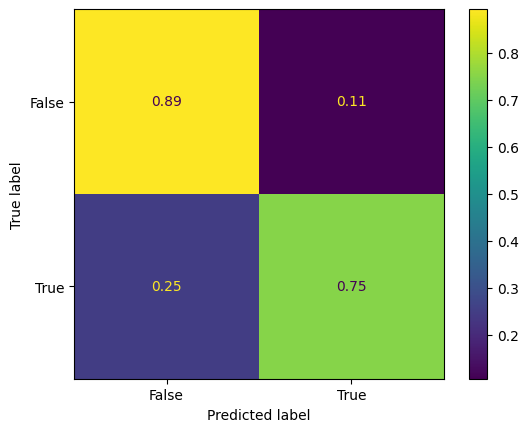

In [86]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lg,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [87]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    438002
           1       0.82      0.75      0.79    287130

    accuracy                           0.84    725132
   macro avg       0.83      0.82      0.83    725132
weighted avg       0.84      0.84      0.84    725132



In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
log_roc = lg.predict_proba(X_test)[:,1]
false_positive_rate_log, true_positive_rate_log, threshold_log = roc_curve(y_test, log_roc)


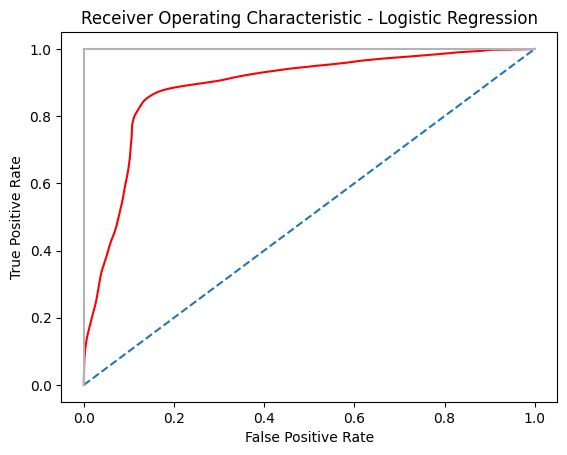

In [89]:
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_log, true_positive_rate_log, color='red')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We got the accuracy of 84% from Logistic Regression. Confusion matrix showed that the True positive and True negative percentage of 89 and 75 which is good but we can do better so lets try another algorithm.   

**Support vector Classifier**

In [92]:
clf = SVC(probability=True)
clf.fit(X_train[:30000,:],y_train[:30000])

SVC(probability=True)

In [93]:
# y_pred= clf.predict(X_test)
# print("Accuracy score of Support Vector Classifier  :", accuracy_score(y_pred, y_test))

clf.score(X_test[:30000,:],y_test[:30000])

0.8981

In [94]:
predicted_3000 = clf.predict(X_test[:3000])

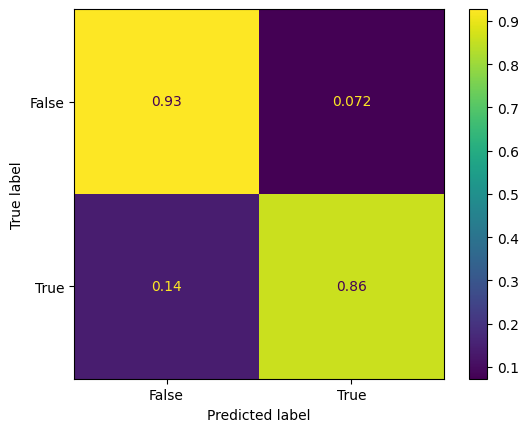

In [95]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test[:3000], predicted_3000,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [96]:
print(classification_report(y_test[:3000,], predicted_3000))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1849
           1       0.88      0.86      0.87      1151

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.90      0.90      3000



In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
svm_roc = clf.predict_proba(X_test[:30000,:])[:,1]
false_positive_rate_svm, true_positive_rate_svm, threshold_log = roc_curve(y_test[:30000], svm_roc)

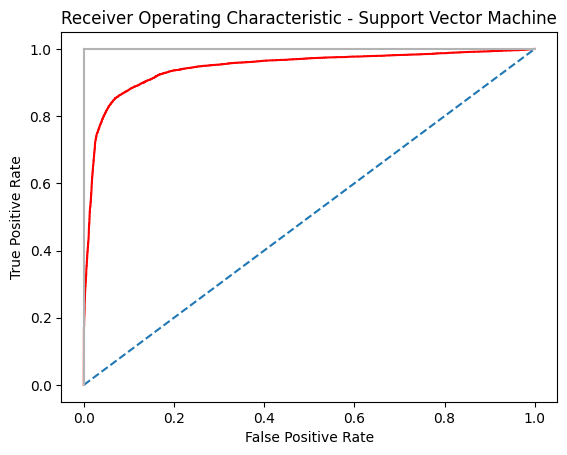

In [98]:
plt.title('Receiver Operating Characteristic - Support Vector Machine')
plt.plot(false_positive_rate_svm, true_positive_rate_svm, color='red')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Here, We fitted our model to Support vector classifier,  We only took 30000 of the total training data and got accuracy of 90%.

**Decision Tree Classifier**





In [99]:
dtc= DecisionTreeClassifier(max_depth= 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [100]:
y_pred_dtc= dtc.predict(X_test)
print("Accuracy score of Decision Tree Classifier :", accuracy_score(y_pred_dtc, y_test))

Accuracy score of Decision Tree Classifier : 0.9041622766613527


In [101]:
print("Feature_importance : ", dtc.feature_importances_)

Feature_importance :  [0.28768408 0.00096951 0.01710413 0.58807242 0.00146535 0.06625329
 0.01118002 0.0272712 ]


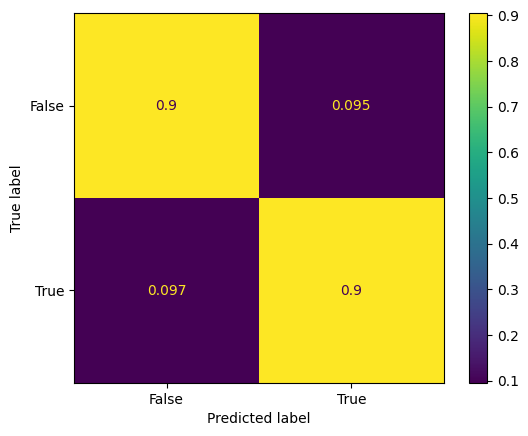

In [102]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dtc,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [103]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92    438002
           1       0.86      0.90      0.88    287130

    accuracy                           0.90    725132
   macro avg       0.90      0.90      0.90    725132
weighted avg       0.91      0.90      0.90    725132



In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
df_roc = dtc.predict_proba(X_test)[:,1]
false_positive_rate_df, true_positive_rate_df, threshold_log = roc_curve(y_test, df_roc)

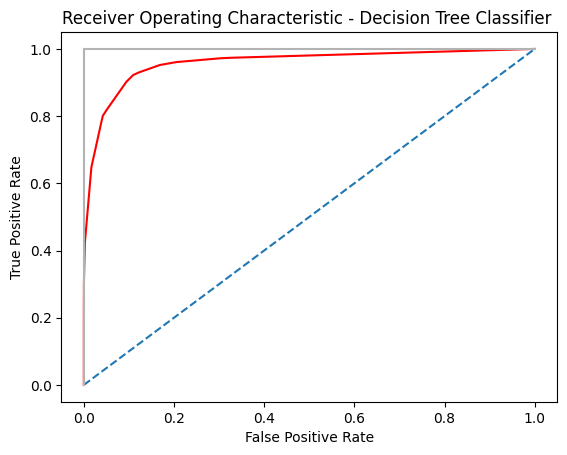

In [105]:
plt.title('Receiver Operating Characteristic - Decision Tree Classifier ')
plt.plot(false_positive_rate_df, true_positive_rate_df, color='red')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We used Decision tree classifier which yielded 90.40 % accuracy.

**Random Forest Classifier**

In [106]:
rf= RandomForestClassifier(max_depth= 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [107]:
y_pred_rf = rf. predict(X_test)
print("Accuracy score of Random Forest Classifier :", accuracy_score(y_pred_rf, y_test))

Accuracy score of Random Forest Classifier : 0.9067397384200394


In [108]:
print("Feature_importance : ", rf.feature_importances_)

Feature_importance :  [0.2194329  0.01238234 0.02208972 0.54041814 0.00464654 0.08874277
 0.07521718 0.0370704 ]


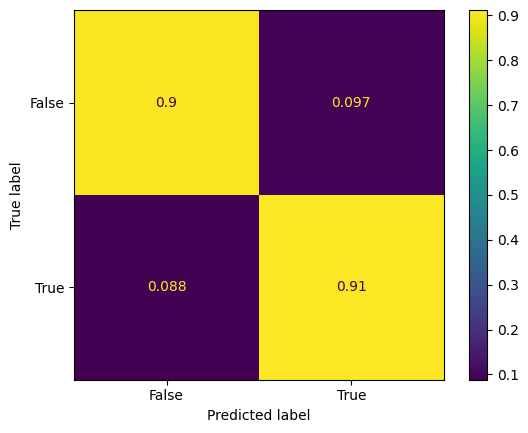

In [109]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [110]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92    438002
           1       0.86      0.91      0.89    287130

    accuracy                           0.91    725132
   macro avg       0.90      0.91      0.90    725132
weighted avg       0.91      0.91      0.91    725132



In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
rf_roc = rf.predict_proba(X_test)[:,1]
false_positive_rate_rf, true_positive_rate_rf, threshold_log = roc_curve(y_test, rf_roc)

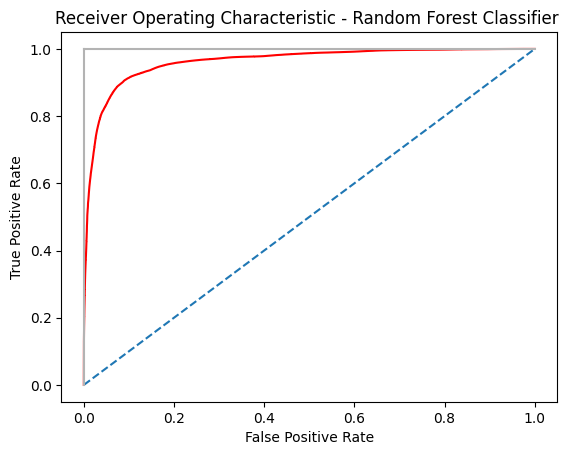

In [112]:
plt.title('Receiver Operating Characteristic - Random Forest Classifier ')
plt.plot(false_positive_rate_rf, true_positive_rate_rf, color='red')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From Random Forest, accuracy of 91 % was obtained.

**Neural Network**

In [113]:
tf.__version__

'2.18.0'

In [114]:

model = Sequential()

#First Hidden Layer
model.add(Dense(input_dim=8, activation='relu',units = 4, kernel_initializer='random_normal'))

#Second Hidden Layer
model.add(Dense(units = 4, activation='relu', kernel_initializer='random_normal'))

#Third Hidden Layer
model.add(Dense(units = 2, activation='relu', kernel_initializer='random_normal'))

#Output Layer
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='random_normal'))


#Compiling the neural network
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

In [116]:
hist= model.fit(X_train,y_train,validation_split=0.2, batch_size=10,epochs=5)



Epoch 1/5
232043/232043 ━━━━━━━━━━━━━━━━━━━━ 652s 3ms/step - accuracy: 0.6025 - loss: 0.6723 - val_accuracy: 0.6020 - val_loss: 0.6722
Epoch 2/5
232043/232043 ━━━━━━━━━━━━━━━━━━━━ 670s 3ms/step - accuracy: 0.6027 - loss: 0.6720 - val_accuracy: 0.6020 - val_loss: 0.6723
Epoch 3/5
232043/232043 ━━━━━━━━━━━━━━━━━━━━ 697s 3ms/step - accuracy: 0.6027 - loss: 0.6720 - val_accuracy: 0.6020 - val_loss: 0.6721
Epoch 4/5
232043/232043 ━━━━━━━━━━━━━━━━━━━━ 638s 3ms/step - accuracy: 0.6033 - loss: 0.6717 - val_accuracy: 0.6020 - val_loss: 0.6722
Epoch 5/5
232043/232043 ━━━━━━━━━━━━━━━━━━━━ 664s 3ms/step - accuracy: 0.6031 - loss: 0.6718 - val_accuracy: 0.6020 - val_loss: 0.6719


In [117]:
X_test.shape

(725132, 8)

22661/22661 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step


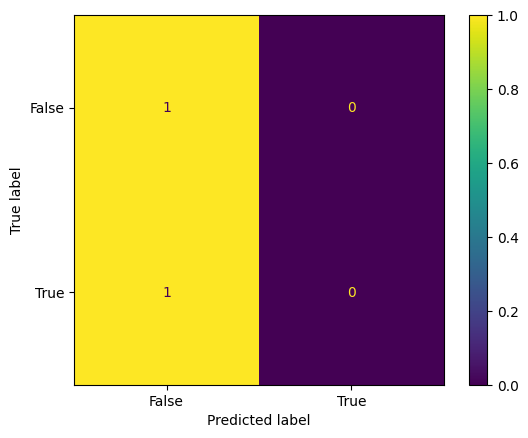

Accuracy of Neural Network: 60.40%


In [118]:
y_pred=model.predict(X_test)
y_pred_nn =(y_pred>0.5)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nn,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
accuracy=accuracy_score(y_test,y_pred_nn)
print("Accuracy of Neural Network: %.2f%%" % (accuracy * 100.0))

[]

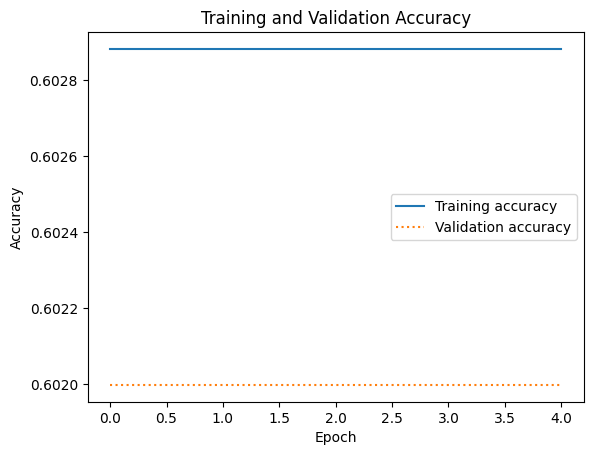

In [119]:
plt.plot(hist.history['accuracy'], '-', label='Training accuracy')
plt.plot(hist.history['val_accuracy'], ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.plot()

In [120]:
print(classification_report(y_test, y_pred_nn))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75    438002
           1       0.00      0.00      0.00    287130

    accuracy                           0.60    725132
   macro avg       0.30      0.50      0.38    725132
weighted avg       0.36      0.60      0.45    725132



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
nn_roc = model.predict(X_test)
false_positive_rate_nn, true_positive_rate_nn, threshold_log = roc_curve(y_test, nn_roc)

22661/22661 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


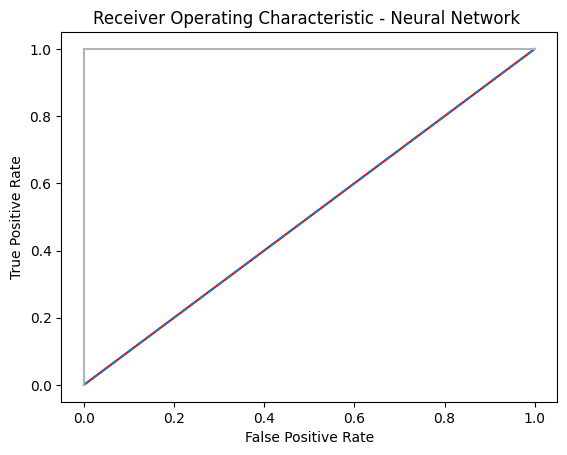

In [122]:
plt.title('Receiver Operating Characteristic - Neural Network ')
plt.plot(false_positive_rate_nn, true_positive_rate_nn, color='red')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Neural Network yielded 88.65 % accuracy.

**XGBOOST**

In [ ]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train,y_train)


In [ ]:
# clf_rand_2.score(X_test,y_test)
# print(clf_xgb_score)
y_pred_xg= clf_xgb.predict(X_test)
print("Accuracy score of XGBoost :", accuracy_score(y_pred_xg, y_test))

# predicted = predicted_2000 = clf_xgb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_xg))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
xg_roc = clf_xgb.predict_proba(X_test)[:,1]
false_positive_rate_xg, true_positive_rate_xg, threshold_log = roc_curve(y_test, xg_roc)

In [ ]:
plt.title('Receiver Operating Characteristic - XGBoost ')
plt.plot(false_positive_rate_xg, true_positive_rate_xg, color='red')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From XGBoost classifier, 92.28 % accuracy was obtained.